In [2]:
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.utils import to_categorical, CustomObjectScope

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import model_from_json
from tensorflow.keras.initializers import he_uniform

import tensorflow as tf
from CNN_MNIST import CNN_model
from tensorflow.keras.optimizers import SGD


In [3]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

## Test model trained on mnist dataset


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train[0].shape, "\n")
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape((-1, img_rows, img_cols, channels))
X_test = X_test.reshape((-1, img_rows, img_cols, channels))

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


(28, 28) 



Data shapes: (60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


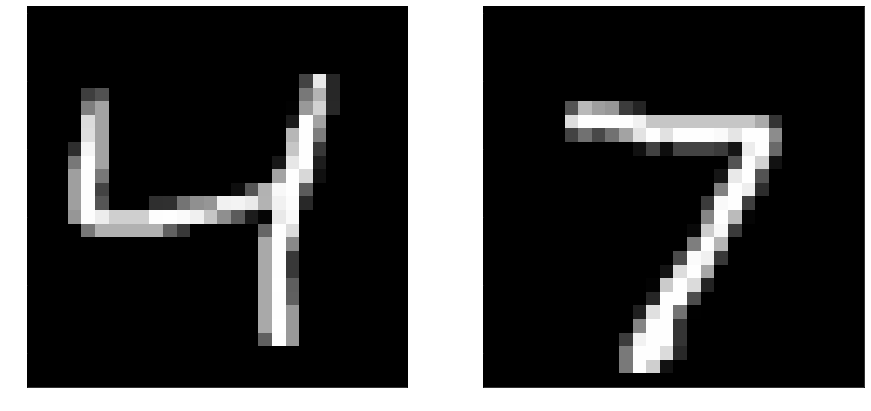

In [5]:
print("Data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(X_train[2], cmap="gray")

plt.subplot(122)
plt.imshow(X_test[0], cmap="gray")

plt.show()

In [5]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
jfile = open("../CNN_model_mnist.json", "r")
loaded_json = jfile.read()
jfile.close()
loaded_model = model_from_json(loaded_json)
loaded_model.load_weights("../CNN_model_mnist.h5")
loaded_model.compile(optimizer='adam', loss="mse", metrics=['accuracy'])

loaded_model.summary()

Model: "Convolutional_Neural_Network_trained_on_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)        

In [94]:
predictions = loaded_model.predict(X_test)
print(labels[loaded_model.predict(X_test[2].reshape((1, img_rows, img_cols, channels))).argmax()])
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

evaluation = loaded_model.evaluate(X_test, y_test)
print(pred, "\n", test)

print("\n%s: %.2f%%" % (loaded_model.metrics_names[1], evaluation[1]*100))



one
313/313 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9830

## Test model trained on cifar dataset


In [10]:
(X_train_C, y_train_C), (X_test_C, y_test_C) = cifar10.load_data()

img_cols_C, img_rows_C, channels_C = 32, 32, 3
num_classes_C = 10

X_train_C = X_train_C / 255
X_test_C = X_test_C / 255

X_train_C = X_train_C.reshape((-1, img_rows_C, img_cols_C, channels_C))
X_test_C = X_test_C.reshape((-1, img_rows_C, img_cols_C, channels_C))

y_train_C = to_categorical(y_train_C, num_classes_C)
y_test_C = to_categorical(y_test_C, num_classes_C)

labels_C = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
jfile = open("../CNN_model_cifar.json", "r")
loaded_json1 = jfile.read()
jfile.close()
with CustomObjectScope({'HeUniform': he_uniform()}):
    loaded_model1 = model_from_json(loaded_json1)
loaded_model1.load_weights("../CNN_model_cifar.h5")
loaded_model1.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss="categorical_crossentropy", metrics=['accuracy'])

loaded_model1.summary()

Model: "CNN_model_cifar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)    

In [11]:
predictions = loaded_model1.predict(X_test_C)
print(labels_C[loaded_model1.predict(X_test_C[2].reshape((1, img_rows_C, img_cols_C, channels_C))).argmax()])
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

test = list()
for i in range(len(y_test_C)):
    test.append(np.argmax(y_test_C[i]))

evaluation = loaded_model1.evaluate(X_test_C, y_test_C)
print(pred, "\n", test)

print("\n%s: %.2f%%" % (loaded_model1.metrics_names[1], evaluation[1]*100))

ship
313/313 [==============================] - 17s 53ms/step - loss: 0.4209 - accuracy: 0.8609

### Test adversarial algorithms on MNIST network:
* FGSM
* JSMA - Jacobian-based Saliency Map Attack


In [1]:
import tensorflow as tf

import numpy as np
import random

import matplotlib.pyplot as plt


def adversarial_patternFGSM(image, label):
    image = tf.cast(image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = loaded_model1(image)
        loss = tf.keras.losses.MSE(label, prediction)

    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)

    return signed_grad

## Example of adversarial image

1
Prediction on adversarial image: seven
Prediction on original image: one
Truth: one


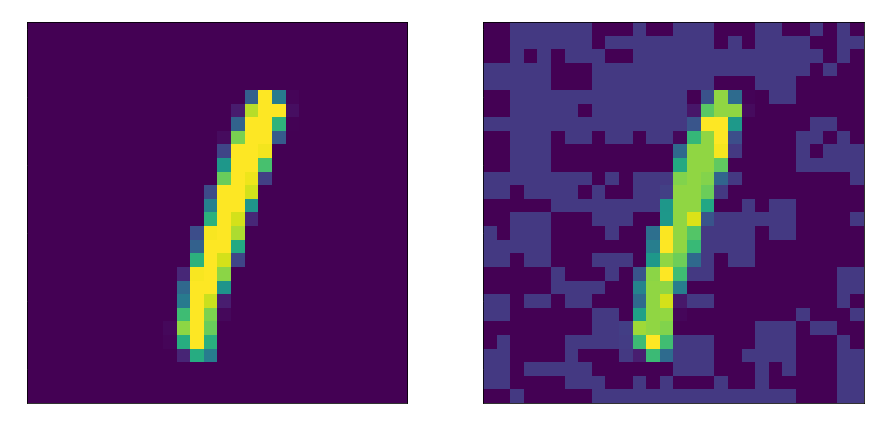

In [97]:
from skimage import io

img = X_test[5]
# print(img.shape)

plt.figure(figsize=(15, 10))
perturb = adversarial_patternFGSM(img.reshape((1, img_rows, img_cols, channels)), y_test[5]).numpy()
adversarial_img = img + perturb*0.1

plt.subplot(1,2,1)
plt.title("Initial image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Adversarial image")
plt.imshow(adversarial_img.reshape((img_rows, img_cols, channels)))

print(f"Prediction on adversarial image: {labels[loaded_model.predict(adversarial_img).argmax()]}")
print(f"Prediction on original image: {labels[loaded_model.predict(img.reshape((1, img_rows, img_cols, channels))).argmax()]}")
print(f"Truth: one")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
Prediction on adversarial image: frog
Prediction on original image: automobile
Truth: one


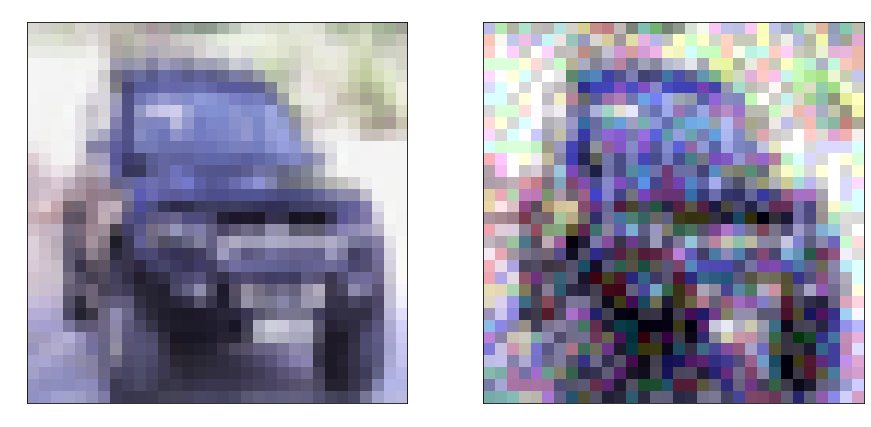

In [16]:
img1 = X_test_C[9]
# print(img.shape)

plt.figure(figsize=(15, 10))
perturb1 = adversarial_patternFGSM(img1.reshape((1, img_rows_C, img_cols_C, channels_C)), y_test_C[9]).numpy()
adversarial_img1 = img1 + perturb1*0.1

plt.subplot(1,2,1)
plt.title("Initial image")
plt.imshow(img1)

plt.subplot(1,2,2)
plt.title("Adversarial image")
plt.imshow(adversarial_img1.reshape((img_rows_C, img_cols_C, channels_C)))

print(f"Prediction on adversarial image: {labels_C[loaded_model1.predict(adversarial_img1).argmax()]}")
print(f"Prediction on original image: {labels_C[loaded_model1.predict(img1.reshape((1, img_rows_C, img_cols_C, channels_C))).argmax()]}")
print(f"Truth: one")


five
three


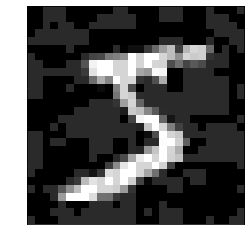

In [47]:
image = X_train[0]
image_label = y_train[0]

perturbations = adversarial_patternFGSM(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.1

print(labels[loaded_model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[loaded_model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)), cmap="gray")
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)), cmap="gray")
plt.show()

6
frog
cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


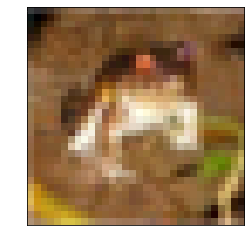

In [44]:
image1 = X_train_C[0]
image_label1 = y_train_C[0]

perturbations1 = adversarial_patternFGSM(image1.reshape((1, img_rows_C, img_cols_C, channels_C)), image_label1).numpy()
adversarial1 = image1 + perturbations1 * 0.01

print(labels_C[loaded_model1.predict(image1.reshape((1, img_rows_C, img_cols_C, channels_C))).argmax()])
print(labels_C[loaded_model1.predict(adversarial1).argmax()])

if channels_C == 1:
    plt.imshow(adversarial1.reshape((img_rows_C, img_cols_C)))
else:
    plt.imshow(adversarial1.reshape((img_rows_C, img_cols_C, channels_C)))
plt.show()


In [46]:
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
         # if batch_size > 10000 and batch % 1000 == 0:
            #     print(batch/batch_size)

            N = random.randint(0, 100)

            label = y_train[N]
            image = X_train[N]

            perturbations = adversarial_patternFGSM(image.reshape((1, img_rows, img_cols, channels)), label).numpy()


            epsilon = 0.1
            adversarial = image + perturbations * epsilon

            x.append(adversarial)
            y.append(y_train[N])


        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)

        yield x, y

In [49]:
def generate_adversarials_C(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
         # if batch_size > 10000 and batch % 1000 == 0:
            #     print(batch/batch_size)

            N = random.randint(0, 100)

            label = y_train_C[N]
            image = X_train_C[N]

            perturbations = adversarial_patternFGSM(image.reshape((1, img_rows_C, img_cols_C, channels_C)), label).numpy()


            epsilon = 0.1
            adversarial = image + perturbations * epsilon

            x.append(adversarial)
            y.append(y_train_C[N])


        x = np.asarray(x).reshape((batch_size, img_rows_C, img_cols_C, channels_C))
        y = np.asarray(y)

        yield x, y


Prediction: five Truth: six
Prediction: six Truth: six
Prediction: nine Truth: zero
Prediction: seven Truth: nine
Prediction: nine Truth: four
Prediction: two Truth: one
Prediction: six Truth: six
Prediction: nine Truth: eight
Prediction: seven Truth: one
Prediction: one Truth: four
Prediction: five Truth: six
Prediction: nine Truth: five


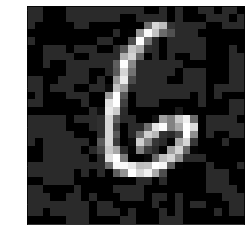

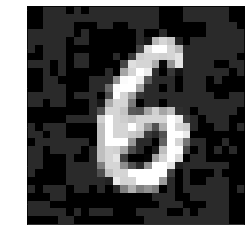

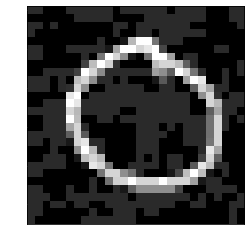

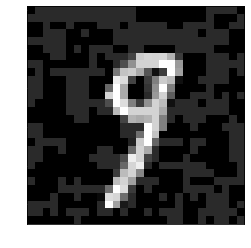

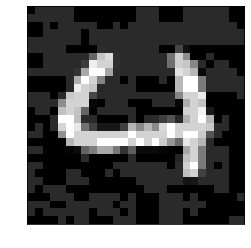

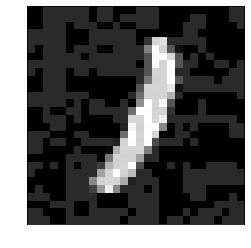

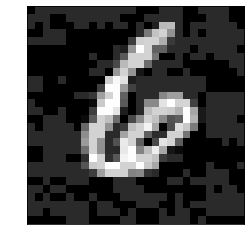

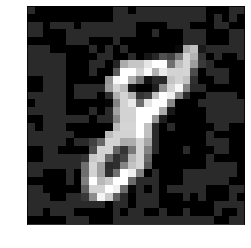

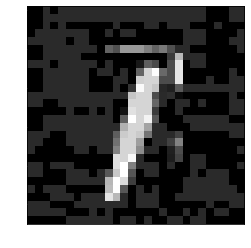

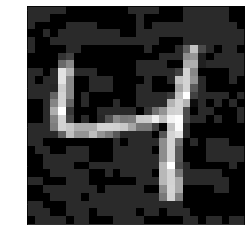

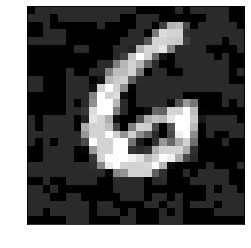

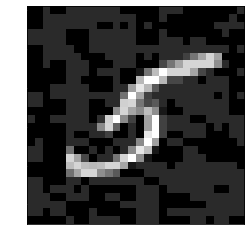

In [49]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

adversarials, correct_labels = next(generate_adversarials(12))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[loaded_model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], 'Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols), cmap="gray")
    else:
        plt.imshow(adversarial, cmap="gray")
    plt.show()

3
1
3
2
4
7
7
9
7
2
7
2
Prediction: frog Truth: dog
Prediction: frog Truth: automobile
Prediction: frog Truth: cat
Prediction: frog Truth: bird
Prediction: frog Truth: deer
Prediction: frog Truth: horse
Prediction: frog Truth: horse
Prediction: frog Truth: truck
Prediction: frog Truth: horse
Prediction: frog Truth: airplane
Prediction: frog Truth: horse
Prediction: cat Truth: bird


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

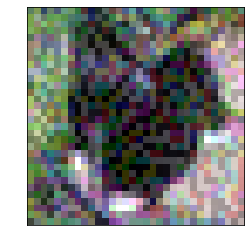

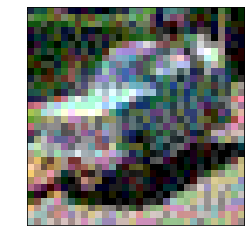

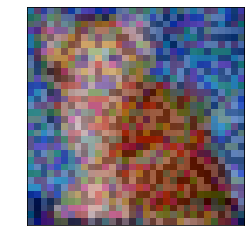

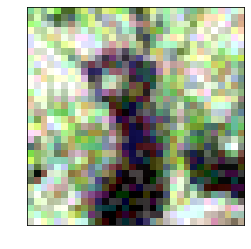

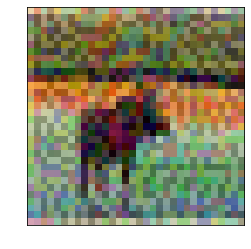

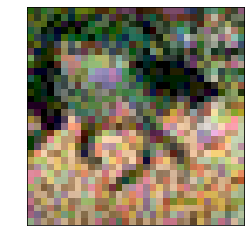

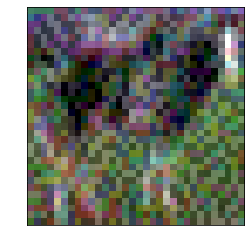

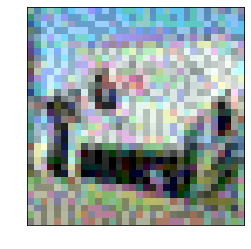

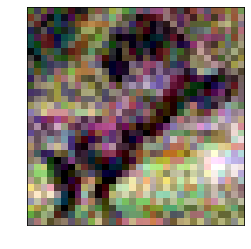

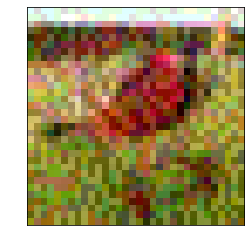

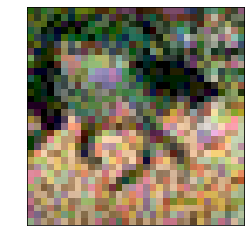

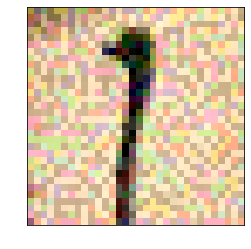

In [52]:
adversarials1, correct_labels1 = next(generate_adversarials_C(12))
for adversarial1, correct_label1 in zip(adversarials1, correct_labels1):
    print('Prediction:', labels_C[loaded_model1.predict(adversarial1.reshape((1, img_rows_C, img_cols_C, channels_C))).argmax()], 'Truth:', labels_C[correct_label1.argmax()])
    if channels_C == 3:
        plt.imshow(adversarial1.reshape(img_rows_C, img_cols_C, channels_C))
    else:
        plt.imshow(adversarial1)
    plt.show()



In [50]:
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

print(x_adversarial_train.shape, y_adversarial_train.shape, "\n")
print(x_adversarial_test.shape, y_adversarial_test.shape)

(20000, 28, 28, 1) (20000, 10) 

(10000, 28, 28, 1) (10000, 10)


In [51]:
CNN_model_adversarial_trained = loaded_model

CNN_model_adversarial_trained.fit(x_adversarial_train, y_adversarial_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

eval_with_adversarial = CNN_model.evalModel(CNN_model_adversarial_trained,
                                                    x_adversarial_test, y_adversarial_test)

eval_regular = CNN_model.evalModel(CNN_model_adversarial_trained, X_test, y_test)

print("Defended %s on adversarial images: %.2f%%" % (CNN_model_adversarial_trained.metrics_names[1] ,eval_with_adversarial[1]*100))
print("Defended %s on regular images: %.2f%%" % (CNN_model_adversarial_trained.metrics_names[1] ,eval_regular[1]*100))

Epoch 1/15
625/625 [==============================] - 4s 7ms/step - loss: 0.0100 - accuracy: 0.9441 - val_loss: 0.0074 - val_accuracy: 0.9575

In [52]:
x_adversarial_test1, y_adversarial_test1 = next(generate_adversarials(10000))
eval_with_adversarial = CNN_model.evalModel(CNN_model_adversarial_trained,
                                                    x_adversarial_test1, y_adversarial_test1)
print("Defended %s on adversarial images: %.2f%%" % (CNN_model_adversarial_trained.metrics_names[1] ,eval_with_adversarial[1]*100))


313/313 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.8518

In [55]:
ask = input("Press S to save model to drive...")

if ask.upper() == "S":
    saved_model = CNN_model_adversarial_trained.to_json()
    with open("CNN_model_mnist_adversarial.json", "w") as json_file:
        json_file.write(saved_model)
    CNN_model_adversarial_trained.save_weights('CNN_model_mnist_adversarial.h5')

